In [ ]:
import spacy
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

class TextSemanticAnalyzer:
    def __init__(self):
        """Initialize the semantic relationship analyzer with spaCy model"""
        self.nlp = spacy.load('en_core_web_sm')
        self.relationship_types = {
            'subject': ['nsubj', 'nsubjpass'],
            'object': ['dobj', 'pobj'],
            'modifier': ['amod', 'advmod'],
            'compound': ['compound']
        }
        
    def extract_relationships(self, text):
        """Extract semantic relationships from input text"""
        doc = self.nlp(text)
        relationships = []
        
        # Extract entity relationships
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        
        # Extract syntactic relationships
        for token in doc:
            if token.dep_ in sum(self.relationship_types.values(), []):
                relationship = {
                    'source': token.head.text,
                    'target': token.text,
                    'relationship': token.dep_,
                    'relationship_category': self._get_relationship_category(token.dep_)
                }
                relationships.append(relationship)
                
        return relationships, entities
    
    def _get_relationship_category(self, dep):
        """Map dependency label to relationship category"""
        for category, deps in self.relationship_types.items():
            if dep in deps:
                return category
        return 'other'
    
    def create_relationship_graph(self, relationships):
        """Create a NetworkX graph from relationships"""
        G = nx.DiGraph()
        
        for rel in relationships:
            G.add_edge(
                rel['source'],
                rel['target'],
                relationship=rel['relationship'],
                category=rel['relationship_category']
            )
            
        return G
    
    def analyze_text(self, text):
        """Complete analysis of input text"""
        relationships, entities = self.extract_relationships(text)
        graph = self.create_relationship_graph(relationships)
        
        # Calculate basic metrics
        metrics = {
            'num_relationships': len(relationships),
            'num_entities': len(entities),
            'num_unique_words': len(set([r['source'] for r in relationships] + [r['target'] for r in relationships])),
            'relationship_types': dict(Counter(r['relationship_category'] for r in relationships))
        }
        
        return {
            'relationships': relationships,
            'entities': entities,
            'graph': graph,
            'metrics': metrics
        }

def visualize_relationships(analysis_results):
    """Generate visualization of semantic relationships"""
    import matplotlib.pyplot as plt
    
    G = analysis_results['graph']
    plt.figure(figsize=(12, 8))
    
    # Create layout
    pos = nx.spring_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=2000, alpha=0.7)
    
    # Draw edges with different colors based on relationship category
    edge_colors = {'subject': 'red', 'object': 'blue', 
                  'modifier': 'green', 'compound': 'purple', 
                  'other': 'gray'}
    
    for category in edge_colors:
        edges = [(u, v) for (u, v, d) in G.edges(data=True) 
                if d['category'] == category]
        nx.draw_networkx_edges(G, pos, edgelist=edges, 
                             edge_color=edge_colors[category], 
                             alpha=0.6, arrows=True)
    
    # Add labels
    nx.draw_networkx_labels(G, pos)
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], color=color, label=cat) 
                      for cat, color in edge_colors.items()]
    plt.legend(handles=legend_elements)
    
    plt.title("Semantic Relationship Visualization")
    plt.axis('off')
    return plt


Extracted Relationships:
Vinci --[compound]--> Leonardo
Vinci --[compound]--> da
studied --[nsubj]--> Vinci
studied --[dobj]--> anatomy
made --[dobj]--> sketches
body --[amod]--> human
of --[pobj]--> body
investigated --[nsubj]--> He
investigated --[dobj]--> connection
between --[pobj]--> eye
made --[nsubj]--> He
made --[advmod]--> also
made --[dobj]--> sketches
of --[pobj]--> heart
advanced --[nsubj]--> work
on --[pobj]--> anatomy
advanced --[advmod]--> greatly
advanced --[dobj]--> understanding
body --[amod]--> human
of --[pobj]--> body

Identified Entities:
Leonardo da Vinci: PERSON
Leonardo: PERSON

Metrics:
num_relationships: 20
num_entities: 2
num_unique_words: 22
relationship_types: {'compound': 2, 'subject': 4, 'object': 10, 'modifier': 4}


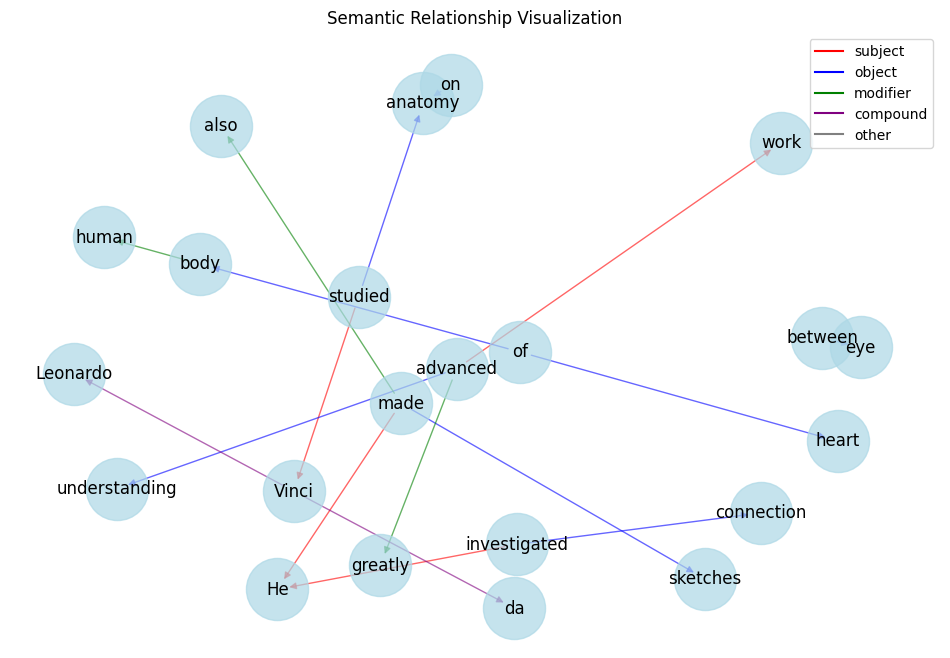

In [ ]:
analyzer = TextSemanticAnalyzer()

text = """
Leonardo da Vinci studied anatomy and made sketches of the human body. He investigated the connection between the eye and the brain.
He also made sketches of the heart and its valves. Leonardo's work on anatomy greatly advanced the understanding of the human body.
"""

# Analyze text
results = analyzer.analyze_text(text)

# Print analysis results
print("\nExtracted Relationships:")
for rel in results['relationships']:
    print(f"{rel['source']} --[{rel['relationship']}]--> {rel['target']}")
    
print("\nIdentified Entities:")
for entity, label in results['entities']:
    print(f"{entity}: {label}")
    
print("\nMetrics:")
for metric, value in results['metrics'].items():
    print(f"{metric}: {value}")

plt = visualize_relationships(results)
plt.show()


Extracted Relationships:
Edison --[compound]--> Thomas
born --[nsubjpass]--> Edison
inventors --[amod]--> most
inventors --[amod]--> prolific
of --[pobj]--> inventors
on --[pobj]--> February
in --[pobj]--> Milan

Identified Entities:
Thomas Edison: PERSON
one: CARDINAL
February 11, 1847: DATE
Milan: GPE
Ohio: GPE

Metrics:
num_relationships: 7
num_entities: 5
num_unique_words: 11
relationship_types: {'compound': 1, 'subject': 1, 'modifier': 2, 'object': 3}


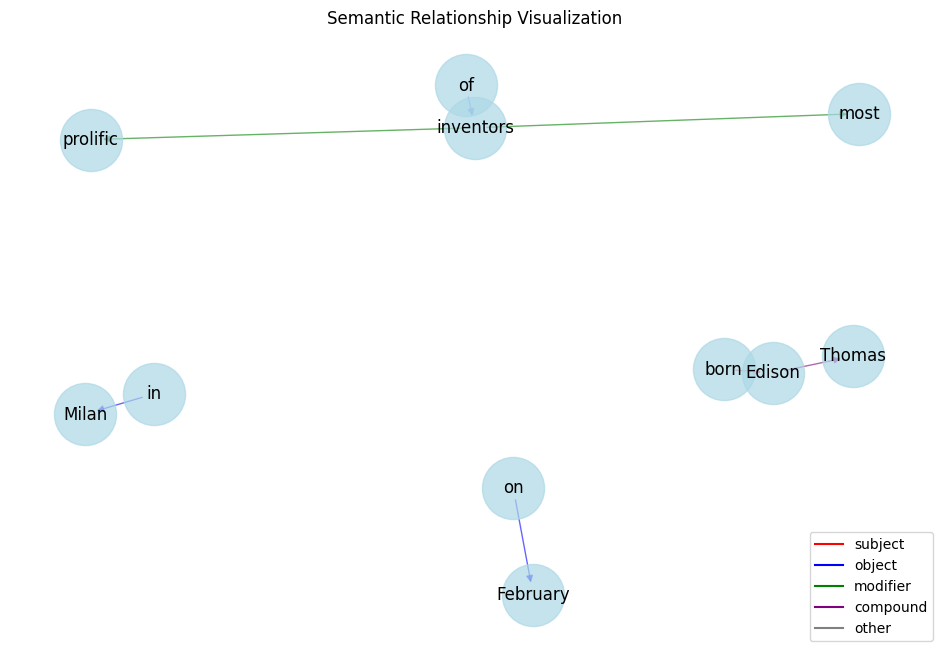


Extracted Relationships:
as --[pobj]--> Wizard
Park --[compound]--> Menlo
of --[pobj]--> Park
curiosity --[amod]--> relentless
work --[nsubj]--> curiosity
led --[nsubj]--> work
work --[advmod]--> ethic
to --[pobj]--> patents
in --[pobj]--> lifetime

Identified Entities:
Wizard of Menlo Park: WORK_OF_ART
Edison: PERSON
over 1,000: CARDINAL

Metrics:
num_relationships: 9
num_entities: 3
num_unique_words: 14
relationship_types: {'object': 4, 'compound': 1, 'modifier': 2, 'subject': 2}


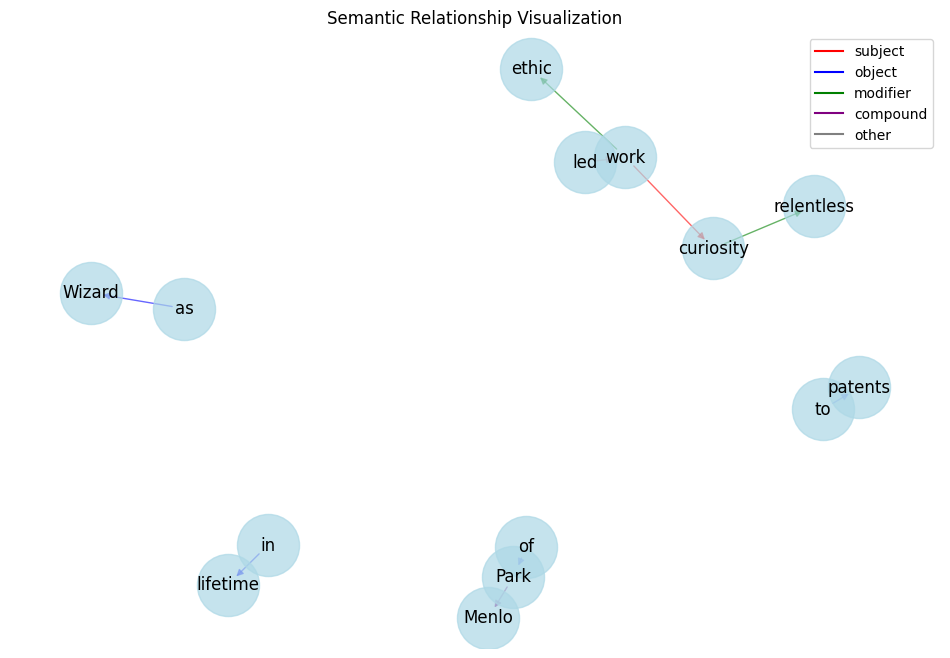


Extracted Relationships:
famous --[advmod]--> most
inventions --[amod]--> famous
Among --[pobj]--> inventions
incandescent --[amod]--> practical
bulb --[compound]--> incandescent
bulb --[compound]--> light
is --[nsubj]--> bulb
revolutionized --[nsubj]--> which
revolutionized --[dobj]--> way
lived --[nsubj]--> people

Identified Entities:

Metrics:
num_relationships: 10
num_entities: 0
num_unique_words: 14
relationship_types: {'modifier': 3, 'object': 2, 'compound': 2, 'subject': 3}


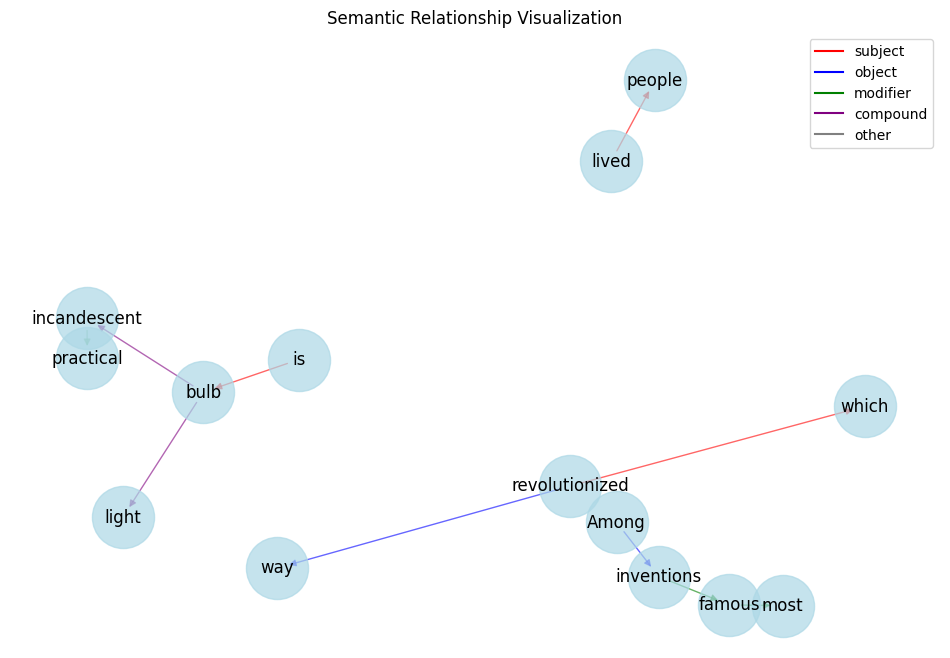


Extracted Relationships:
done --[nsubjpass]--> work
in --[pobj]--> isolation
collaborated --[nsubj]--> he
individuals --[amod]--> talented
with --[pobj]--> individuals
Tesla --[compound]--> Nikola
like --[pobj]--> Tesla
worked --[nsubj]--> who
worked --[advmod]--> briefly
with --[pobj]--> him
assistant --[amod]--> loyal
Batchelor --[compound]--> Charles

Identified Entities:
Edison: ORG
Nikola Tesla: ORG
Charles Batchelor: PERSON

Metrics:
num_relationships: 12
num_entities: 3
num_unique_words: 20
relationship_types: {'subject': 3, 'object': 4, 'modifier': 3, 'compound': 2}


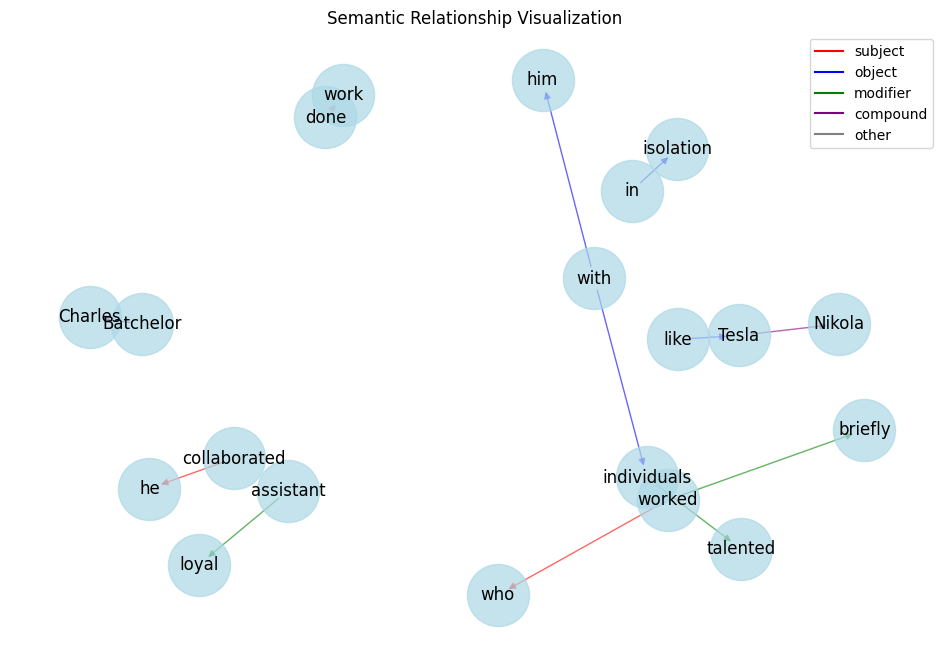


Extracted Relationships:
Park --[compound]--> Menlo
laboratory --[compound]--> Park
referred --[nsubj]--> laboratory
Jersey --[compound]--> New
in --[pobj]--> Jersey
referred --[advmod]--> often
lab --[amod]--> first
lab --[amod]--> industrial
lab --[compound]--> research
as --[pobj]--> lab
of --[pobj]--> innovation
worked --[advmod]--> where
worked --[nsubj]--> teams
of --[pobj]--> inventors
worked --[advmod]--> together
ideas --[amod]--> groundbreaking
bring --[dobj]--> ideas
to --[pobj]--> life
bulb --[amod]--> light
beyond --[pobj]--> bulb

Identified Entities:
Edison: ORG
Menlo Park: GPE
New Jersey: GPE
first: ORDINAL
Edison: PERSON

Metrics:
num_relationships: 20
num_entities: 5
num_unique_words: 28
relationship_types: {'compound': 4, 'subject': 2, 'object': 7, 'modifier': 7}


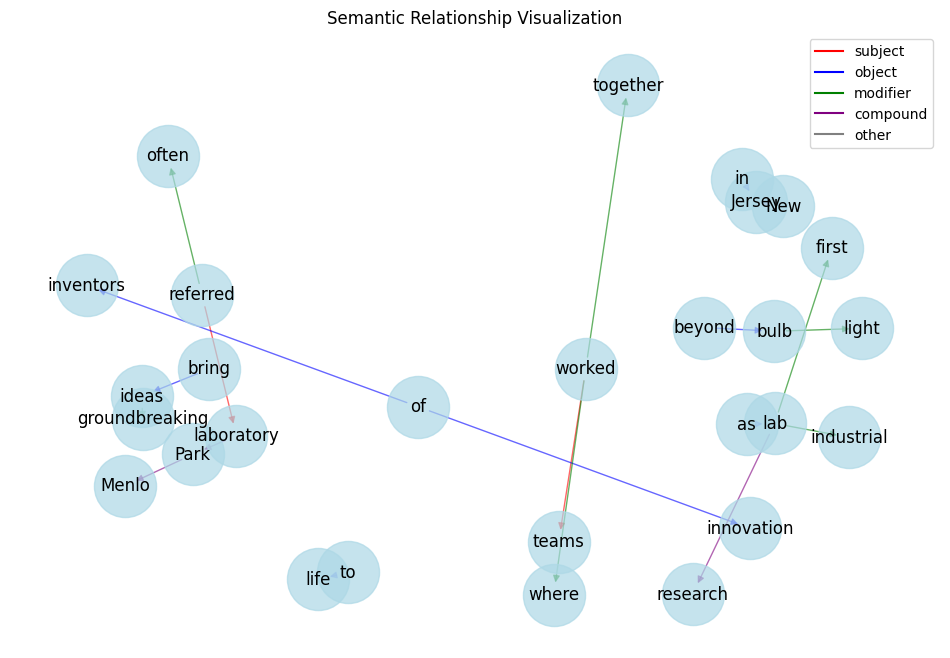


Extracted Relationships:
developed --[nsubj]--> He
developed --[dobj]--> phonograph
record --[nsubj]--> that
play --[dobj]--> sound
amazed --[nsubj]--> which
amazed --[dobj]--> people
amazed --[advmod]--> worldwide

Identified Entities:

Metrics:
num_relationships: 7
num_entities: 0
num_unique_words: 11
relationship_types: {'subject': 3, 'object': 3, 'modifier': 1}


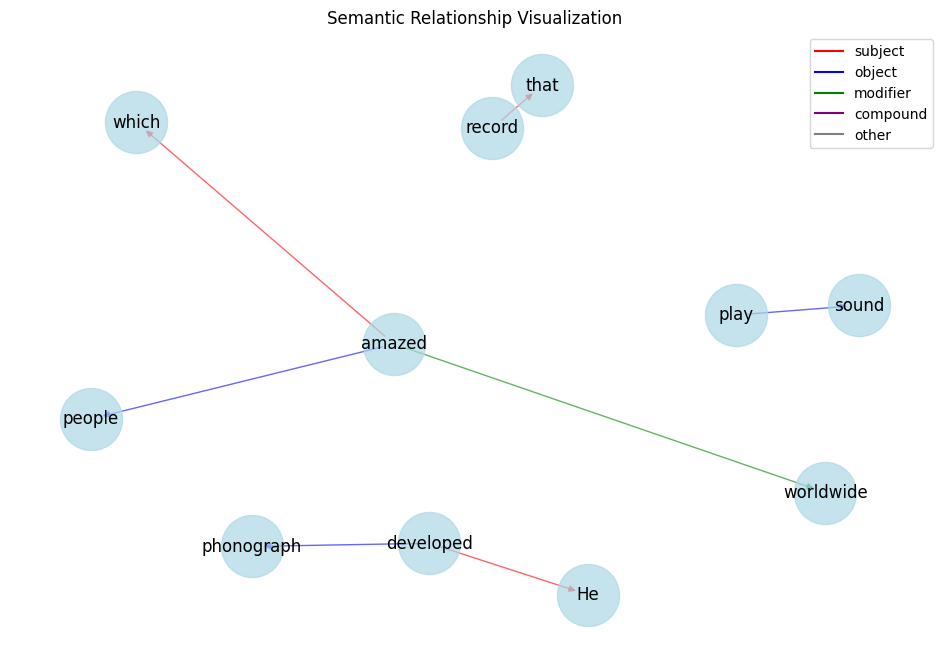


Extracted Relationships:
In --[pobj]--> 1877
recorded --[nsubj]--> he
recorded --[advmod]--> famously
rhyme --[compound]--> nursery
recorded --[dobj]--> rhyme
Had --[nsubj]--> Mary
Lamb --[compound]--> Little
Had --[dobj]--> Lamb
on --[pobj]--> phonograph
showcasing --[dobj]--> potential

Identified Entities:
1877: DATE
Mary Had a Little Lamb: WORK_OF_ART

Metrics:
num_relationships: 10
num_entities: 2
num_unique_words: 15
relationship_types: {'object': 5, 'subject': 2, 'modifier': 1, 'compound': 2}


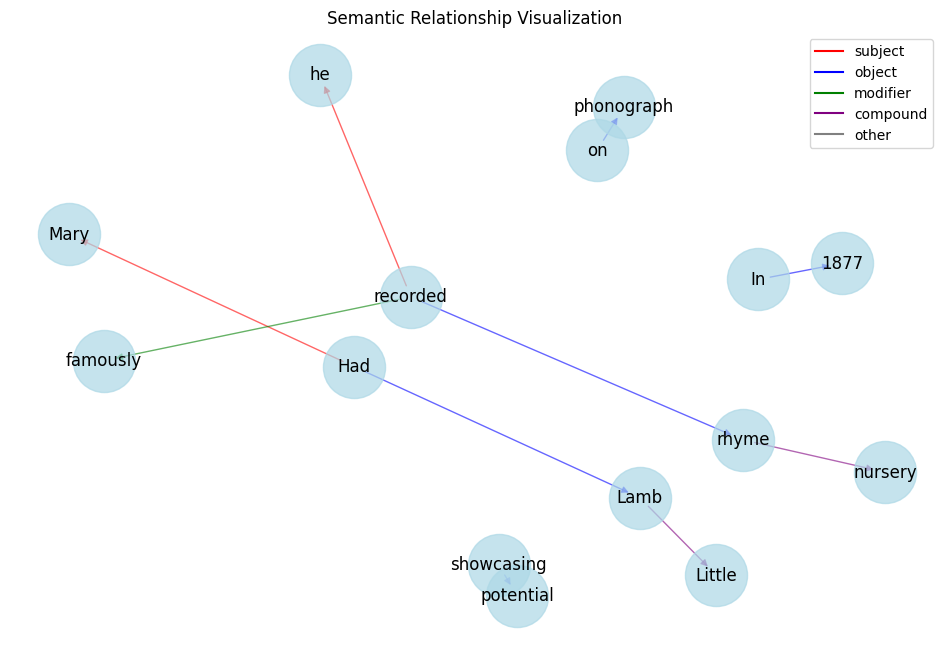


Extracted Relationships:
improved --[nsubj]--> Edison
improved --[advmod]--> also
improved --[dobj]--> telegraph
laid --[nsubj]--> work
pictures --[compound]--> motion
on --[pobj]--> pictures
laid --[dobj]--> foundation
industry --[amod]--> modern
industry --[compound]--> film
for --[pobj]--> industry

Identified Entities:
Edison: ORG

Metrics:
num_relationships: 10
num_entities: 1
num_unique_words: 14
relationship_types: {'subject': 2, 'modifier': 2, 'object': 4, 'compound': 2}


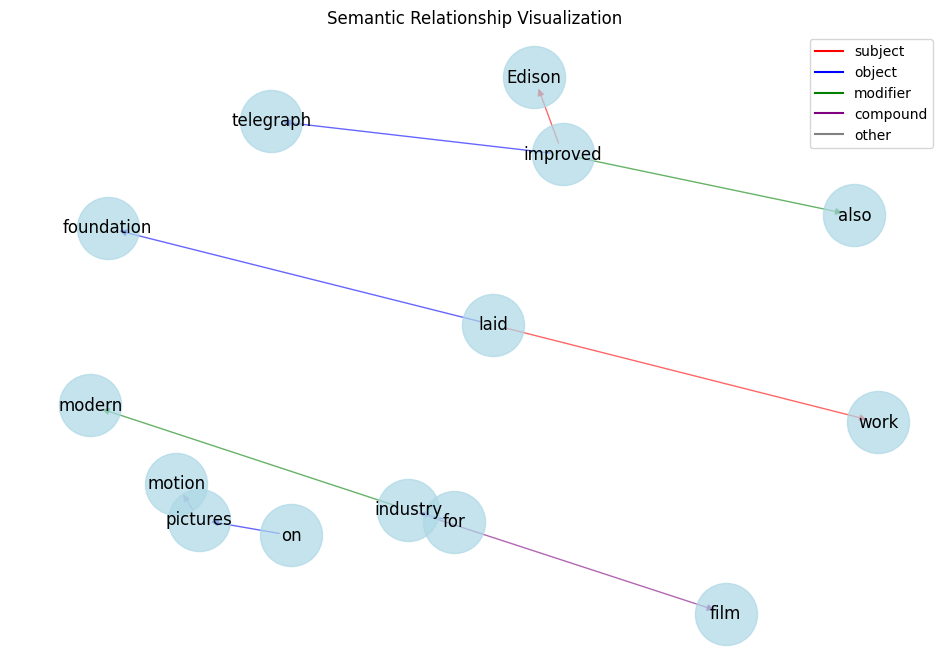


Extracted Relationships:
extended --[nsubj]--> contributions
extended --[advmod]--> even
kingdom --[compound]--> animal
to --[pobj]--> kingdom
for --[pobj]--> instance
used --[nsubj]--> he
filament --[amod]--> carbonized
filament --[compound]--> bamboo
used --[dobj]--> filament
bulb --[amod]--> light
in --[pobj]--> bulb
by --[pobj]--> strength
of --[pobj]--> bamboo
used --[dobj]--> material
associated --[advmod]--> often
with --[pobj]--> pandas
in --[pobj]--> Asia

Identified Entities:
Asia: LOC

Metrics:
num_relationships: 17
num_entities: 1
num_unique_words: 25
relationship_types: {'subject': 2, 'modifier': 4, 'compound': 2, 'object': 9}


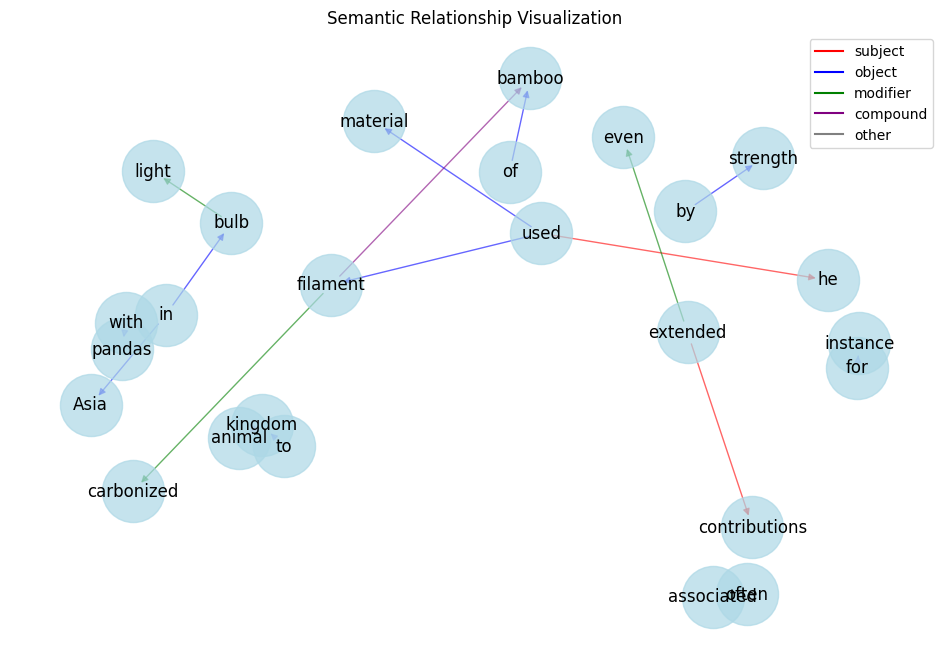


Extracted Relationships:
reached --[nsubj]--> influence
reached --[dobj]--> cities
across --[pobj]--> globe
York --[compound]--> New
from --[pobj]--> York
installed --[advmod]--> where
installed --[nsubj]--> he
grid --[compound]--> first
power --[compound]--> electric
grid --[compound]--> power
installed --[dobj]--> grid
to --[pobj]--> Paris
showcased --[advmod]--> where
showcased --[nsubjpass]--> inventions
Universelle --[compound]--> Exposition
at --[pobj]--> Universelle
facing --[dobj]--> challenges
hearing --[dobj]--> loss
setbacks --[amod]--> financial
left --[nsubj]--> perseverance
mark --[amod]--> indelible
left --[dobj]--> mark
on --[pobj]--> world

Identified Entities:
Edison: ORG
New York: GPE
first: ORDINAL
Paris: GPE
1889: DATE
Edison: ORG

Metrics:
num_relationships: 23
num_entities: 6
num_unique_words: 34
relationship_types: {'subject': 4, 'object': 10, 'compound': 5, 'modifier': 4}


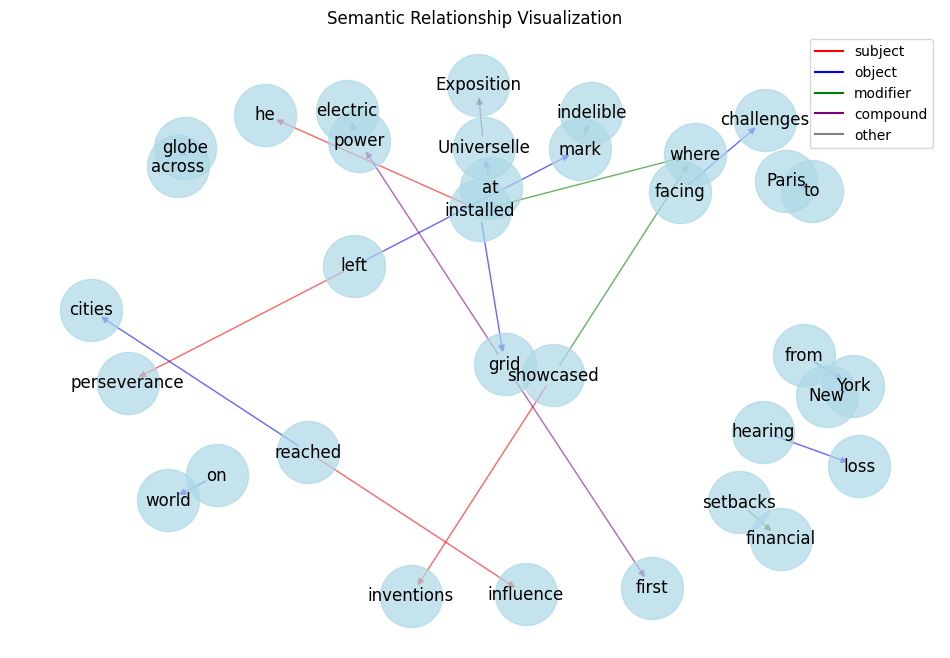


Extracted Relationships:
earned --[nsubj]--> achievements
accolades --[amod]--> numerous
earned --[dobj]--> accolades
Medal --[compound]--> Congressional
Medal --[compound]--> Gold
including --[pobj]--> Medal
in --[pobj]--> 1928

Identified Entities:
the Congressional Gold Medal: ORG
1928: DATE

Metrics:
num_relationships: 7
num_entities: 2
num_unique_words: 10
relationship_types: {'subject': 1, 'modifier': 1, 'object': 3, 'compound': 2}


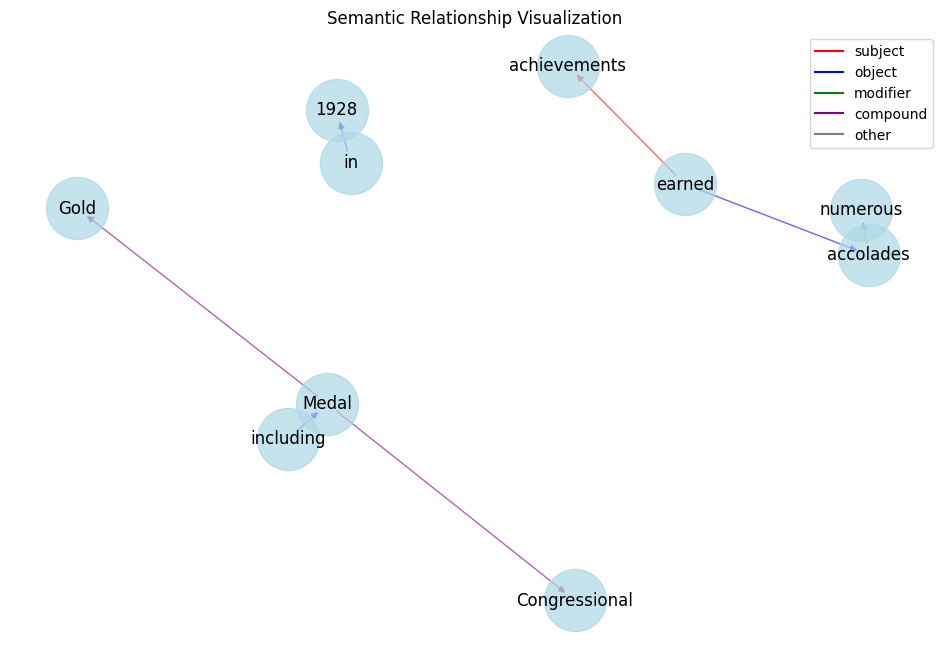


Extracted Relationships:
lives --[nsubj]--> legacy
technologies --[amod]--> countless
in --[pobj]--> technologies
use --[nsubj]--> we
lighting --[amod]--> electric
from --[pobj]--> lighting
music --[amod]--> recorded
to --[pobj]--> music

Identified Entities:
Edison: ORG
today: DATE

Metrics:
num_relationships: 8
num_entities: 2
num_unique_words: 13
relationship_types: {'subject': 2, 'modifier': 3, 'object': 3}


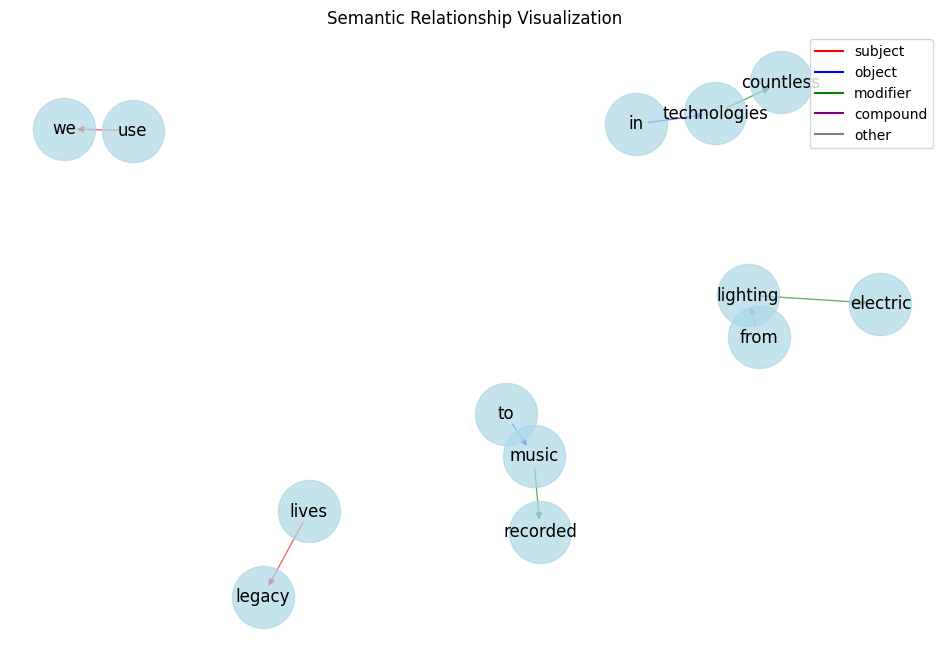


Extracted Relationships:
is --[nsubj]--> story
to --[pobj]--> power
of --[pobj]--> collaboration

Identified Entities:

Metrics:
num_relationships: 3
num_entities: 0
num_unique_words: 6
relationship_types: {'subject': 1, 'object': 2}


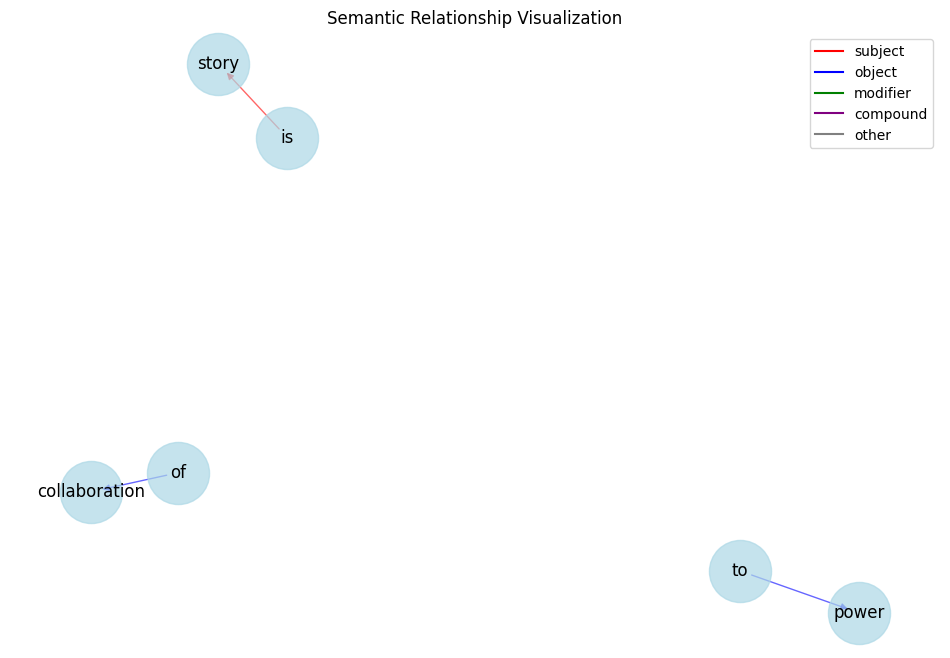


Extracted Relationships:
said --[nsubj]--> Edison
said --[advmod]--> once
is --[nsubj]--> Genius
inspiration --[compound]--> percent
nine --[compound]--> ninety
perspiration --[compound]--> percent
continues --[nsubj]--> that
inspire --[dobj]--> inventors
inspire --[advmod]--> worldwide

Identified Entities:
Edison: ORG
Genius: PERSON
one percent: PERCENT
ninety-nine percent: PERCENT

Metrics:
num_relationships: 9
num_entities: 4
num_unique_words: 15
relationship_types: {'subject': 3, 'modifier': 2, 'compound': 3, 'object': 1}


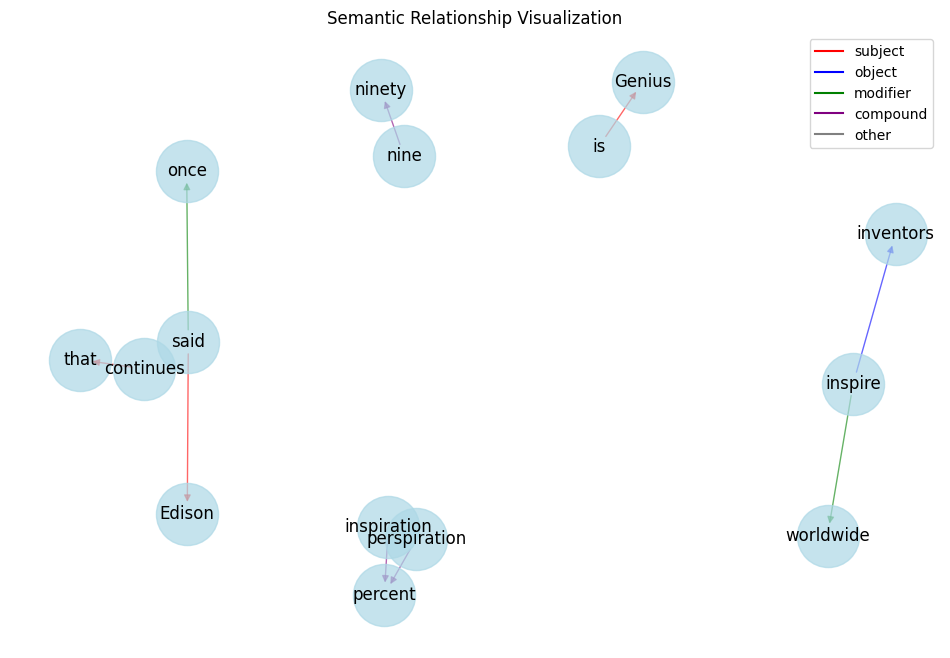


Extracted Relationships:
Through --[pobj]--> inventions
influenced --[nsubj]--> he
Edison --[compound]--> Thomas
illuminated --[nsubj]--> Edison
illuminated --[dobj]--> path
future --[amod]--> brighter
to --[pobj]--> future

Identified Entities:
Thomas Edison: PERSON

Metrics:
num_relationships: 7
num_entities: 1
num_unique_words: 11
relationship_types: {'object': 3, 'subject': 2, 'compound': 1, 'modifier': 1}


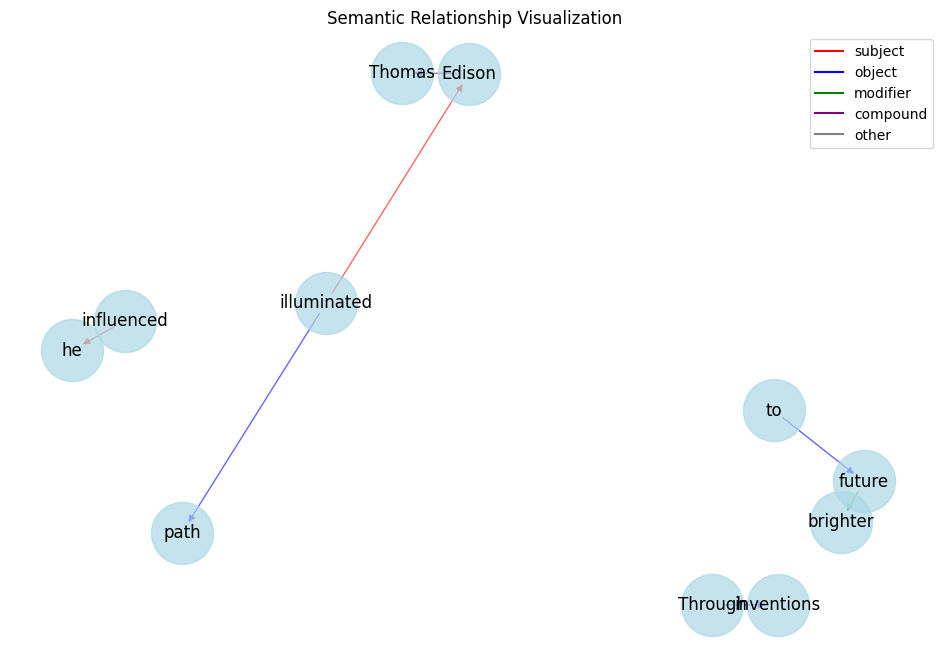

In [ ]:
text = """
Thomas Edison, one of history's most prolific inventors, was born on February 11, 1847, in Milan, Ohio. Known as the "Wizard of Menlo Park," Edison's relentless curiosity and tireless work ethic led to over 1,000 patents in his lifetime. Among his most famous inventions is the practical incandescent light bulb, which revolutionized the way people lived and worked. Edison's work was not done in isolation; he collaborated with talented individuals like Nikola Tesla, who briefly worked with him, and his loyal assistant, Charles Batchelor. Edison's Menlo Park laboratory in New Jersey, often referred to as the first industrial research lab, became a hub of innovation, where teams of inventors worked together to bring groundbreaking ideas to life.

Edison's achievements extended beyond the light bulb. He developed the phonograph, a device that could record and play back sound, which amazed people worldwide. In 1877, he famously recorded the nursery rhyme "Mary Had a Little Lamb" on his phonograph, showcasing its potential. Edison also improved the telegraph and telephone, and his work on motion pictures laid the foundation for the modern film industry. His contributions even extended to the animal kingdom; for instance, he used a carbonized bamboo filament in his light bulb, inspired by the strength and flexibility of bamboo, a material often associated with pandas in Asia. Edison's influence reached cities across the globe, from New York, where he installed the first electric power grid, to Paris, where his inventions were showcased at the 1889 Exposition Universelle.

Despite facing challenges, including hearing loss and financial setbacks, Edison's perseverance and ingenuity left an indelible mark on the world. His achievements earned him numerous accolades, including the Congressional Gold Medal in 1928. Edison's legacy lives on in the countless technologies we use today, from electric lighting to recorded music. His story is a testament to the power of collaboration, curiosity, and determination. Edison once said, "Genius is one percent inspiration and ninety-nine percent perspiration," a phrase that continues to inspire inventors and dreamers worldwide. Through his inventions and the people he influenced, Thomas Edison illuminated the path to a brighter future.
"""
sentences = text.split('. ') 
for sentence in sentences:
    results = analyzer.analyze_text(sentence)
    # Print analysis results
    print("\nExtracted Relationships:")
    for rel in results['relationships']:
        print(f"{rel['source']} --[{rel['relationship']}]--> {rel['target']}")
        
    print("\nIdentified Entities:")
    for entity, label in results['entities']:
        print(f"{entity}: {label}")
        
    print("\nMetrics:")
    for metric, value in results['metrics'].items():
        print(f"{metric}: {value}")
    plt = visualize_relationships(results)
    plt.show()
